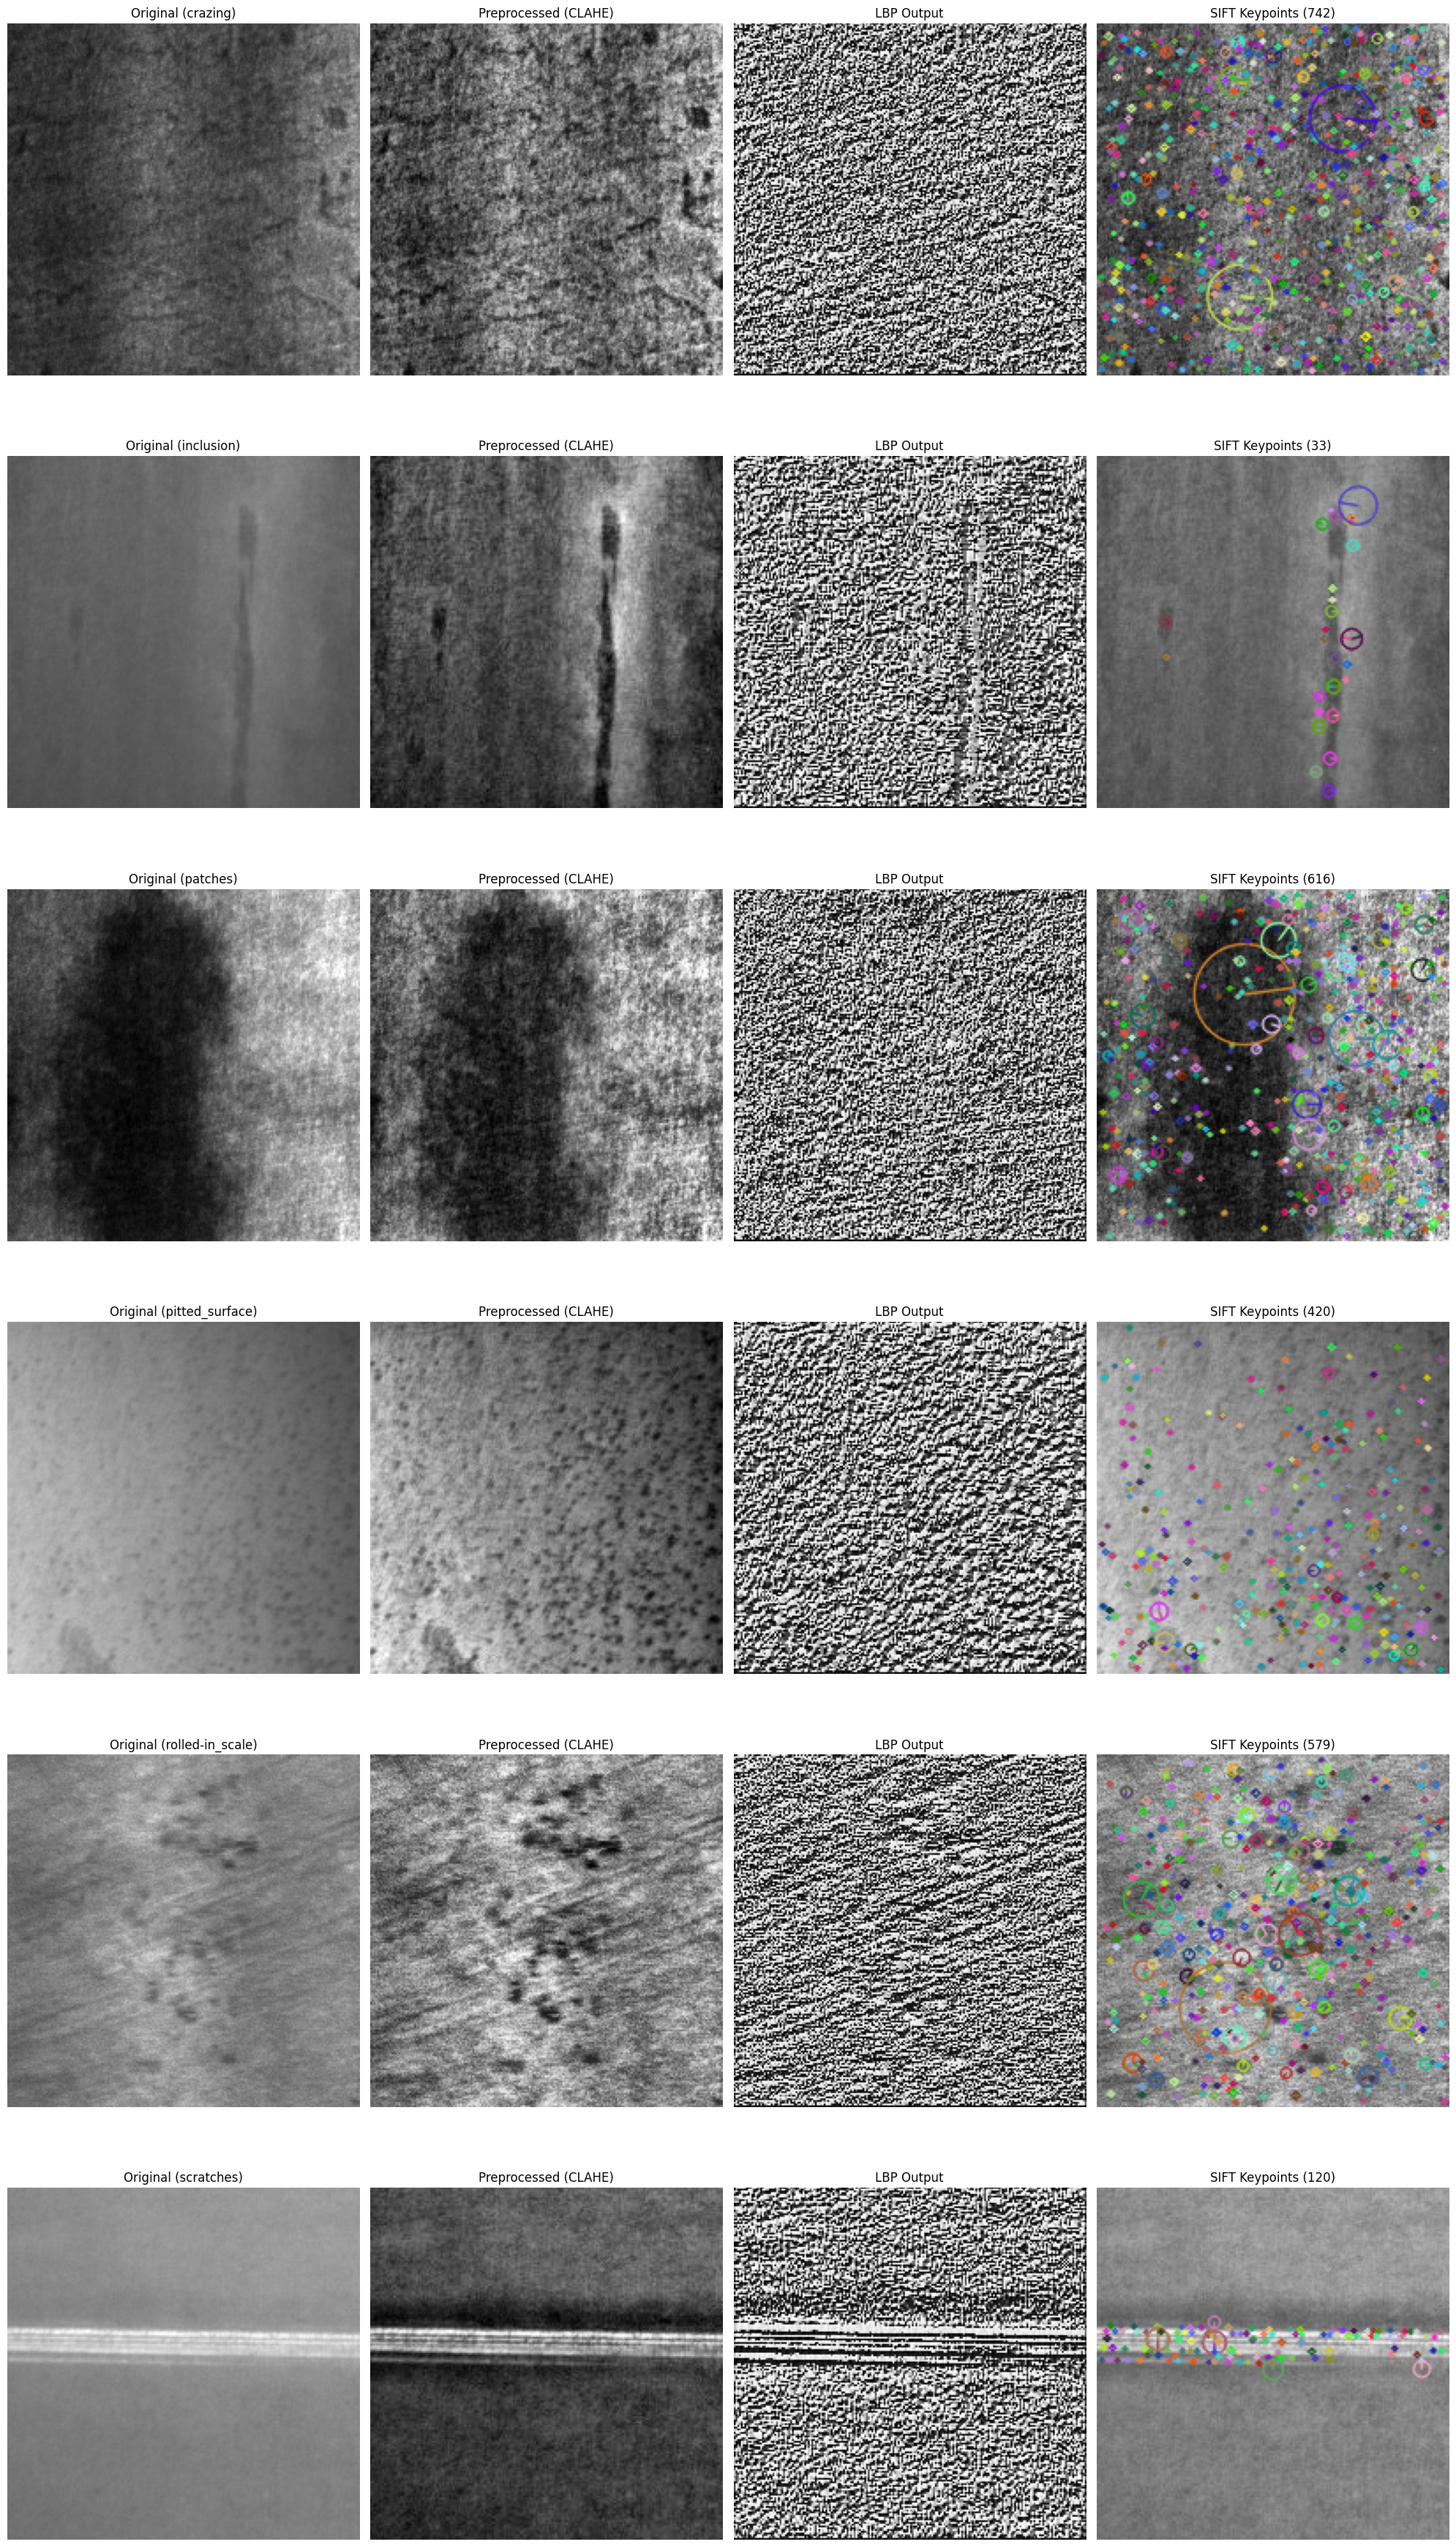

In [19]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# ---- CONFIG ----
img_dir = '../data/NEU-DET/train/images/'

# ---- GET 1 RANDOM IMAGE PER LABEL ----
samples = []
class_dirs = sorted([d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))])

for cls in class_dirs:
    cls_path = os.path.join(img_dir, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.png', '.bmp'))]
    if img_files:
        chosen = random.choice(img_files)
        samples.append(os.path.join(cls_path, chosen))

num_samples = len(samples)

# ---- PREPROCESSING FUNCTIONS ----
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

def preprocess_image(image):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_AREA)
    gray = clahe.apply(gray)
    return gray

def compute_lbp(gray):
    return local_binary_pattern(gray, P=8, R=1, method='default')

def compute_sift(gray):
    sift = cv2.SIFT_create()
    keypoints, desc = sift.detectAndCompute(gray, None)
    kp_img = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return kp_img, len(keypoints)

# ---- PLOT RESULTS ----
fig, axes = plt.subplots(num_samples, 4, figsize=(20, 6 * num_samples))

for i, img_path in enumerate(samples):
    img = cv2.imread(img_path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = preprocess_image(img_path)
    lbp = compute_lbp(gray)
    sift_img, kp_count = compute_sift(gray)

    label_name = os.path.basename(os.path.dirname(img_path))

    axes[i][0].imshow(rgb)
    axes[i][0].set_title(f"Original ({label_name})")
    axes[i][0].axis("off")

    axes[i][1].imshow(gray, cmap='gray')
    axes[i][1].set_title("Preprocessed (CLAHE)")
    axes[i][1].axis("off")

    axes[i][2].imshow(lbp, cmap='gray')
    axes[i][2].set_title("LBP Output")
    axes[i][2].axis("off")

    axes[i][3].imshow(sift_img, cmap='gray')
    axes[i][3].set_title(f"SIFT Keypoints ({kp_count})")
    axes[i][3].axis("off")

plt.tight_layout()
plt.show()
